<a href="https://colab.research.google.com/github/pratzz/Diabetes-Readmission-Prediction/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/diabetic_data.csv")

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
def frequency_table(data, columns):
    for column in columns:
        print("*"*50)
        print(pd.crosstab(index=data[column],  
                           columns="count").sort_values(by = "count", 
                                                        ascending = False))
        print("*"*50)

frequency_table(data, ['readmitted'])

**************************************************
col_0       count
readmitted       
NO          38094
>30         26849
<30          7434
**************************************************


### Calculating frequency for each column
#### Encode Categorical columns 
race, gender, admission_type_id, discharge_disposition_id, admission_source_id, num_lab_procedures, 
num_medications, metformin, repaglinide, nateglinide, glimepiride, glipizide, glyburide, pioglitazone, 
rosiglitazone, acarbose,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change, diabetesMed, readmitted
    
#### Dropping columns
encounter_id, patient_nbr (identifiers)
weight(missing 97%), payer_code(missing 40%), medical_specialty(missing 50%)
acetohexamide, tolbutamide,examide, troglitazone, citoglipton, glimepiride-pioglitazone, glipizide-metformin, metformin-rosiglitazone, glyburide-metformin (not administered to significant number of patients)

In [ ]:
drop_cols= ["encounter_id", "patient_nbr", "weight", 
            "payer_code", "medical_specialty", 
            "acetohexamide", "tolbutamide", "examide", 
            "troglitazone", "citoglipton", 
            "glimepiride-pioglitazone", "glipizide-metformin", 
            "metformin-rosiglitazone", "glyburide-metformin"]
data = data.drop(drop_cols, axis=1)

In [ ]:
def correlation_num_cols():
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_cols = data.select_dtypes(include=numerics).columns
    return data.corr().style.background_gradient().set_precision(2)

correlation_num_cols()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.00,0.08,0.11,-0.01,-0.14,0.13,0.08,0.03,-0.02,-0.04,-0.12
discharge_disposition_id,0.08,1.00,0.02,0.16,0.02,0.02,0.11,-0.01,-0.02,0.02,0.05
admission_source_id,0.11,0.02,1.00,-0.01,0.05,-0.14,-0.05,0.03,0.06,0.04,0.07
time_in_hospital,-0.01,0.16,-0.01,1.00,0.32,0.19,0.47,-0.01,-0.01,0.07,0.22
num_lab_procedures,-0.14,0.02,0.05,0.32,1.00,0.06,0.27,-0.01,-0.00,0.04,0.15
num_procedures,0.13,0.02,-0.14,0.19,0.06,1.00,0.39,-0.02,-0.04,-0.07,0.07
num_medications,0.08,0.11,-0.05,0.47,0.27,0.39,1.00,0.05,0.01,0.06,0.26
number_outpatient,0.03,-0.01,0.03,-0.01,-0.01,-0.02,0.05,1.00,0.09,0.11,0.09
number_emergency,-0.02,-0.02,0.06,-0.01,-0.00,-0.04,0.01,0.09,1.00,0.27,0.06
number_inpatient,-0.04,0.02,0.04,0.07,0.04,-0.07,0.06,0.11,0.27,1.00,0.10


In [ ]:
data["age"] = data["age"].map(lambda x: x.lstrip('[').rstrip(')'))

def col_split(df, col):
    df[col]=0.5*(df[col].str.partition('-')[0].astype(float)+
                    df[col].str.partition('-')[2].astype(float))
    return df

data = col_split(data, "age")

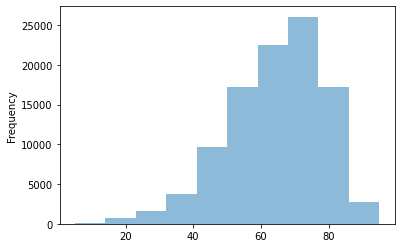

In [ ]:
data["age"].plot.hist(alpha=0.5)

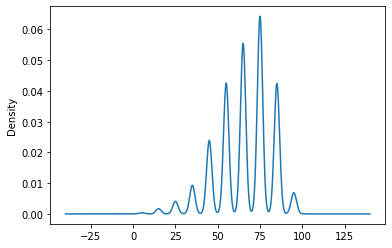

In [ ]:
data["age"].plot.density()

In [ ]:
# import numpy
# import matplotlib.pyplot as plt

# cols = ["age", "gender"] #, "gender", "A1Cresult", "readmitted", "admission_source"
# def plot_density_bar():
#     for col in cols:
#         col_density = pd.crosstab(index = data[col],  
#                     columns="count")
#         data[col].plot.hist(alpha=0.5).plot(col_density)
#         plt.show()
# plot_density_bar()

In [ ]:
def drop_null(data, cols):
    for col in cols:
        data = data[data[col] != "?"]
    return data

cols = ["race", "diag_1", "diag_2", "diag_3"]
data = drop_null(data, cols)

In [ ]:
# drop discharge_disposition_id - 3,4,5,7,8,10,11,13,14,16,17,18,19,20,21,22,23,24,25,26,28

def drop_row(col, values):
    df = data[~data[col].isin(values)]
    return df

values = [3,4,5,7,8,10,11,13,14,16,17,18,19,20,21,22,23,24,25,26,28]
data = drop_row("discharge_disposition_id",values)
data["discharge_disposition_id"].unique()

array([ 1,  6,  2, 12,  9, 15, 27])

In [ ]:
# frequency_table()

In [ ]:

def prob_table(data, col, y):
    print("*"*50)
    print("feature/column:", col)
    temp_data = pd.crosstab(index=data[y], 
                             columns=data[col],
                             margins=True)   # Include row and column totals

    cols = sorted(data[col].unique())
    cols.append("rowtotal")
    temp_data.columns = cols
    temp_data.index= ["<30",">30","NO","coltotal"]

    print((temp_data/temp_data.loc["coltotal"]).round(2))
    print("*"*50)
    
columns = ["discharge_disposition_id","admission_source_id", "num_lab_procedures", "num_procedures",
 "max_glu_serum", "number_outpatient", "number_inpatient",
 "number_emergency", "number_diagnoses", "A1Cresult", "change"]
# for col in columns:
#     prob_table(data, col, "readmitted")

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# def encode(data, col, values):
#     enc = OneHotEncoder(categories = [values],
#                         handle_unknown = 'ignore')
#     enc.fit(data[col].values.reshape(-1, 1))
#     print(enc.transform(data[col].values.reshape(-1, 1)).toarray())
#     return data

# encode_cols = {
#     "discharge_disposition_id":["1"],
#     "max_glu_serum": [">200", ">300", "None"],
#     "A1Cresult": [">7", ">8", "Norm"],
#     "change": ["Ch"]
# }

# for col, values in encode_cols.items():
#     data = encode(data, col, values)
#     break

In [ ]:
data = data.drop("num_procedures", axis=1)

In [ ]:
def create_features(data, info):
    for col, col_info in info.items():
        for name in col_info:
            values = col_info[name]
            data[col+name] = data[col].isin(values).astype(int)
        data = data.drop(col, axis=1)
    return data

In [ ]:
# Encode these columns
info = {
    "admission_source_id": {">30": ["20"]},
    "num_lab_procedures": {"<30": ["132"], ">30": ["104", "129"]},
    "number_outpatient": {"<30":["23", "40"],
                          ">30":["6", "7", "10", "11", "12", "14", "15", "16", "18", "19", 
                                 "20", "21", "22", "23", "25", "26", "27", "28", "29", 
                                 "33", "34","35", "36", "37", "38", "39", "42"]},
    "number_inpatient": {"<30":["8", "9", "11", "12", "13", "15", "19", "21"],
                         ">30": ["2", "3", "4", "5", "6", "14","18"]},
    "number_emergency": {"<30": ["20", "21", "28", "64"],
                         ">30": ["2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12",
                                 "13", "14", "15", "18", "19", "21", "22", "24", "29", "42",
                                 "46", "54", "63", "76"]},
    "number_diagnoses": {">30":["11", "12"]},
    
    "discharge_disposition_id":{"1": ["1"]},
    "max_glu_serum": {"GS_MT200":[">200"],
                      "GS_MT300": [">300"],
                      "GS_NO": ["None"]},
    "A1Cresult": {"A1C_MT7": [">7"],
                  "A1C_MT8": [">8"],
                  "A1c_norm": ["Norm"]},
    "change": {"_encoded": ["Ch"]}
          }
data = create_features(data, info)

In [ ]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_medications', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'metformin-pioglitazone',
       'diabetesMed', 'readmitted', 'admission_source_id>30',
       'num_lab_procedures<30', 'num_lab_procedures>30',
       'number_outpatient<30', 'number_outpatient>30', 'number_inpatient<30',
       'number_inpatient>30', 'number_emergency<30', 'number_emergency>30',
       'number_diagnoses>30', 'discharge_disposition_id1',
       'max_glu_serumGS_MT200', 'max_glu_serumGS_MT300', 'max_glu_serumGS_NO',
       'A1CresultA1C_MT7', 'A1CresultA1C_MT8', 'A1CresultA1c_norm',
       'change_encoded'],
      dtype='object')

In [ ]:
# convert to dummies
cat_cols = ["age", "race","gender","admission_type_id",
            "metformin","repaglinide","nateglinide",
            "chlorpropamide", "glimepiride", "glipizide",
            "glyburide", "pioglitazone", "rosiglitazone",
            "acarbose", "miglitol" , "tolazamide", "insulin",
           "diabetesMed", "metformin-pioglitazone"]

data = pd.get_dummies(data, columns=cat_cols)

In [ ]:
# data.to_csv("try.csv")

In [ ]:
data.head()

,time_in_hospital,num_medications,diag_1,diag_2,diag_3,readmitted,admission_source_id>30,num_lab_procedures<30,num_lab_procedures>30,number_outpatient<30,number_outpatient>30,number_inpatient<30,number_inpatient>30,number_emergency<30,number_emergency>30,number_diagnoses>30,discharge_disposition_id1,max_glu_serumGS_MT200,max_glu_serumGS_MT300,max_glu_serumGS_NO,A1CresultA1C_MT7,A1CresultA1C_MT8,A1CresultA1c_norm,change_encoded,age_5.0,age_15.0,age_25.0,age_35.0,age_45.0,age_55.0,age_65.0,age_75.0,age_85.0,age_95.0,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,tolazamide_No,tolazamide_Steady,insulin_Down,insulin_No,insulin_Steady,insulin_Up,diabetesMed_No,diabetesMed_Yes,metformin-pioglitazone_No
1,3,18,276,250.01,255,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1
2,2,13,648,250,V27,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
3,2,16,8,250.43,403,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1
4,1,8,197,157,250,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
5,3,16,414,411,250,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1


In [ ]:
import numpy as np
import string

circulatory_range = list(map(lambda n: '%g'%n, np.arange(390, 459, 0.1)))
circulatory_range.extend(["459","785"])
data.loc[data['diag_1'].isin(circulatory_range),"diag_1"] = "Circulatory"
data.loc[data['diag_2'].isin(circulatory_range),"diag_2"] = "Circulatory"
data.loc[data['diag_3'].isin(circulatory_range),"diag_3"] = "Circulatory"

respiratory_range = list(map(lambda n: '%g'%n, np.arange(460,519,0.1)))
respiratory_range.extend(["519", "786"])
data.loc[data['diag_1'].isin(respiratory_range),"diag_1"] = "Respiratory"
data.loc[data['diag_2'].isin(respiratory_range),"diag_2"] = "Respiratory"
data.loc[data['diag_3'].isin(respiratory_range),"diag_3"] = "Respiratory"

digestive_range = list(map(lambda n: '%g'%n, np.arange(520, 579, 0.1)))
digestive_range.extend(["579", "787"])
data.loc[data['diag_1'].isin(digestive_range),"diag_1"] = "Digestive"
data.loc[data['diag_2'].isin(digestive_range),"diag_2"] = "Digestive"
data.loc[data['diag_3'].isin(digestive_range),"diag_3"] = "Digestive"
                       
diabetes_range = list(map(lambda n: '%g'%n, np.arange(250,251, 0.01)))
diabetes_range.extend(["251","787"])
data.loc[data['diag_1'].isin(diabetes_range),"diag_1"] = "Diabetes"
data.loc[data['diag_2'].isin(diabetes_range),"diag_2"] = "Diabetes"
data.loc[data['diag_3'].isin(diabetes_range),"diag_3"] = "Diabetes"
                       
injury_range = list(map(lambda n: '%g'%n, np.arange(800, 999, 0.1)))
injury_range.append("999")
data.loc[data['diag_1'].isin(injury_range),"diag_1"] = "Injury"
data.loc[data['diag_2'].isin(injury_range),"diag_2"] = "Injury"
data.loc[data['diag_3'].isin(injury_range),"diag_3"] = "Injury"

# injury_acc_range = ['V57', 'V55', 'V58', 
#                     'V53', 'V45', 'V54', 
#                     'V56', 'V67', 'V71', 
#                     'V26','V63', 'V25',
#                     'V51']
# data.loc[data['diag_1'].isin(injury_acc_range),"diag_1"] = "Injury_Accident"
# data.loc[data['diag_2'].isin(injury_acc_range),"diag_2"] = "Injury_Accident"
# data.loc[data['diag_3'].isin(injury_acc_range),"diag_3"] = "Injury_Accident"

musculoskeletal_range = list(map(lambda n: '%g'%n, np.arange(710, 739, 0.1)))
injury_range.append("739")
data.loc[data['diag_1'].isin(musculoskeletal_range),"diag_1"] = "Musculoskeletal"
data.loc[data['diag_2'].isin(musculoskeletal_range),"diag_2"] = "Musculoskeletal"
data.loc[data['diag_3'].isin(musculoskeletal_range),"diag_3"] = "Musculoskeletal"
                       
genito_urinary_range = list(map(lambda n: '%g'%n, np.arange(580, 629, 0.1)))
genito_urinary_range.extend(["629", "788"])
data.loc[data['diag_1'].isin(genito_urinary_range),"diag_1"] = "GenitoUrinary"
data.loc[data['diag_2'].isin(genito_urinary_range),"diag_2"] = "GenitoUrinary"
data.loc[data['diag_3'].isin(genito_urinary_range),"diag_3"] = "GenitoUrinary"

neoplasms_range = list(map(lambda n: '%g'%n, np.arange(1, 239, 0.1)))
neoplasms_range.extend(list(map(lambda n: '%g'%n, np.arange(790, 799, 0.1))))
neoplasms_range.extend(list(map(lambda n: '%g'%n, np.arange(240, 249, 0.1))))
neoplasms_range.extend(list(map(lambda n: '%g'%n, np.arange(251, 279, 0.1))))
neoplasms_range.extend(list(map(lambda n: '%g'%n, np.arange(680, 709, 0.1))))
neoplasms_range.extend(["239", "799", "249", "279", "709", "780", "781", "784", "782"])
data.loc[data['diag_1'].isin(neoplasms_range),"diag_1"] = "Neoplasms"
data.loc[data['diag_2'].isin(neoplasms_range),"diag_2"] = "Neoplasms"
data.loc[data['diag_3'].isin(neoplasms_range),"diag_3"] = "Neoplasms"
                       
others_range = list(map(lambda n: '%g'%n, np.arange(280, 389, 0.01)))
others_range.extend(list(map(lambda n: '%g'%n, np.arange(630, 679, 0.1))))
others_range.extend(list(map(lambda n: '%g'%n, np.arange(740, 759, 0.1))))
others_range.extend(["389", "679", "759", "783", "789", "E909"])
# others_range.extend(list(string.ascii_uppercase))
data.loc[data['diag_1'].isin(others_range),"diag_1"] = "Others"
data.loc[data['diag_2'].isin(others_range),"diag_2"] = "Others"
data.loc[data['diag_3'].isin(others_range),"diag_3"] = "Others"

data.loc[data['diag_1'].str.match('^[E-V][0-9]*$'), "diag_1"] = "Others"
data.loc[data['diag_2'].str.match('^[E-V][0-9]*$'), "diag_2"] = "Others"
data.loc[data['diag_3'].str.match('^[E-V][0-9]*$'), "diag_3"] = "Others"

In [ ]:
# import re

# codes = ['V15', 'V10', 'V42', 'V12', 'E932', 'E888',
#        'E939', 'V43', 'E937', 'E878', 'E944', 'E870', 'E849', 'V23',
#        'V44', 'E934', 'E915', 'V17', 'E950', 'V72', 'E885', 'E879', 'V49',
#        'E890', 'E817', 'V14', 'E931', 'E924', 'V46', 'V64', 'E942', 'V65',
#        'V61', 'E947', 'E880', 'V08', 'E929', 'E812', 'E900', 'E930',
#        'V09', 'E941', 'E935', 'E933', 'E928', 'V11', 'E813', 'E884',
#        'E936', 'E905', 'E917', 'E868', 'E854', 'V16', 'V18', 'V70',
#        'E918', 'V13', 'E850', 'E927', 'E881', 'E829', 'E919', 'E916',
#        'E858', 'V62', 'V85', 'E819', 'E826', 'E938', 'E816', 'V02',
#        'E906', 'E818', 'E814', 'E980', 'V50', 'E853', 'E968', 'E882',
#        'E821', 'V69', 'V86', 'E887', 'E945', 'V60', 'V27', 'V42', 'V10', 'E932', 'E885', 'E934',
#        'E879', 'E878', 'V17', 'V12', 'E935', 'V44', 'E849', 'V15', 'E942',
#        'V64', 'E947', 'E949', 'V09', 'V18', 'E938', 'E816', 'V65', 'E920',
#        'V23', 'E950', 'V16', 'V14', 'E888', 'E931', 'E930', 'V46', 'E956',
#        'E929', 'E945', 'E928', 'E904', 'E980', 'E933', 'E861', 'E870',
#        'V49', 'E880', 'E944', 'E905', 'E941', 'V08', 'V02', 'E939',
#        'E884', 'E936', 'E876', 'E937', 'V62', 'E924', 'E916', 'E812',
#        'E819', 'V72', 'E965', 'E858', 'E855', 'E927', 'E906', 'E919',
#        'V66', 'V70', 'V60', 'V61', 'E850', 'E881', 'V85', 'E943', 'E917',
#        'E813', 'E894', 'V13', 'V01', 'E887', 'E853', 'E828', 'E865',
#        'E946', 'V86', 'V03', 'E892', 'V11', 'V07', 'E864', 'E825', 'E818',
#        'E900', 'V06', 'E854']

# for x in codes:
#   if not re.match('^[E-V][0-9]*',x):
#       print ('Wrong')

In [ ]:
data["diag_1"].unique()

array(['Neoplasms', 'Others', 'Circulatory', 'Diabetes', 'Respiratory',
       'Injury', 'GenitoUrinary', 'Digestive', 'Musculoskeletal'],
      dtype=object)

In [ ]:
data["diag_2"].unique()

array(['Diabetes', 'Neoplasms', 'Circulatory', 'Respiratory', 'Others',
       'Injury', 'Musculoskeletal', 'GenitoUrinary', 'Digestive'],
      dtype=object)

In [ ]:
data["diag_3"].unique()

array(['Neoplasms', 'Others', 'Circulatory', 'Diabetes', 'Injury',
       'GenitoUrinary', 'Respiratory', 'Digestive', 'Musculoskeletal'],
      dtype=object)

In [ ]:
data.head(10)

,time_in_hospital,num_medications,diag_1,diag_2,diag_3,readmitted,admission_source_id>30,num_lab_procedures<30,num_lab_procedures>30,number_outpatient<30,number_outpatient>30,number_inpatient<30,number_inpatient>30,number_emergency<30,number_emergency>30,number_diagnoses>30,discharge_disposition_id1,max_glu_serumGS_MT200,max_glu_serumGS_MT300,max_glu_serumGS_NO,A1CresultA1C_MT7,A1CresultA1C_MT8,A1CresultA1c_norm,change_encoded,age_5.0,age_15.0,age_25.0,age_35.0,age_45.0,age_55.0,age_65.0,age_75.0,age_85.0,age_95.0,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,tolazamide_No,tolazamide_Steady,insulin_Down,insulin_No,insulin_Steady,insulin_Up,diabetesMed_No,diabetesMed_Yes,metformin-pioglitazone_No
1,3,18,Neoplasms,Diabetes,Neoplasms,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1
2,2,13,Others,Diabetes,Others,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
3,2,16,Neoplasms,Diabetes,Circulatory,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1
4,1,8,Neoplasms,Neoplasms,Diabetes,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
5,3,16,Circulatory,Circulatory,Diabetes,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
6,4,21,Circulatory,Circulatory,Others,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
7,5,12,Circulatory,Respiratory,Diabetes,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
8,13,28,Circulatory,Circulatory,Neoplasms,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
10,9,17,Diabetes,Circulatory,Injury,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
11,7,11,Neoplasms,Others,Neoplasms,<30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1


In [ ]:
from category_encoders.hashing import HashingEncoder

X = pd.DataFrame(data, columns=data.columns)
y = data.readmitted
he = HashingEncoder(cols=['diag_1', 'diag_2', 'diag_3'], n_components = 3).fit(X, y)
data = he.transform(X)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72377 entries, 1 to 101765
Columns: 102 entries, col_0 to metformin-pioglitazone_No
dtypes: int64(23), object(1), uint8(78)
memory usage: 19.2+ MB


In [ ]:
data.head()

,col_0,col_1,col_2,time_in_hospital,num_medications,readmitted,admission_source_id>30,num_lab_procedures<30,num_lab_procedures>30,number_outpatient<30,number_outpatient>30,number_inpatient<30,number_inpatient>30,number_emergency<30,number_emergency>30,number_diagnoses>30,discharge_disposition_id1,max_glu_serumGS_MT200,max_glu_serumGS_MT300,max_glu_serumGS_NO,A1CresultA1C_MT7,A1CresultA1C_MT8,A1CresultA1c_norm,change_encoded,age_5.0,age_15.0,age_25.0,age_35.0,age_45.0,age_55.0,age_65.0,age_75.0,age_85.0,age_95.0,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,tolazamide_No,tolazamide_Steady,insulin_Down,insulin_No,insulin_Steady,insulin_Up,diabetesMed_No,diabetesMed_Yes,metformin-pioglitazone_No
1,0,0,3,3,18,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1
2,0,0,3,2,13,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
3,0,1,2,2,16,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1
4,0,0,3,1,8,NO,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
5,0,2,1,3,16,>30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72377 entries, 1 to 101765
Columns: 102 entries, col_0 to metformin-pioglitazone_No
dtypes: int64(23), object(1), uint8(78)
memory usage: 19.2+ MB
